We imported several packages: pandas (for data manipulation), numpy (for numerical computing), matplotlib.pyplot (for plotting) ,seaborn (for more advanced plotting), sklearn.preprocessing (for preprocessing data), statsmodels.api and ,statsmodels.formula.api (for statistical modeling), datetime (for working with dates), statsmodels.tsa.statespace.sarimax (for time series analysis), sklearn.linear_model (for linear regression analysis)

It also sets the seaborn style as the default, specifies to display the plots inline, and makes sure that statsmodels.formula.api uses pandas dataframes in its formulas.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
sns.set()
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from datetime import datetime

import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
df= pd.read_csv("C:/Users/ROEYE/OneDrive/Documents/City_House Prices.csv")

In [5]:
#MERGE ALL DATES TO A SINGLE COLUMN CALLED DATE


# select rows
selected_rows = df.loc[[0,26], df.columns[8:285]]

# select the desired data
df_selected = df.iloc[26, 8:285].to_frame().T

# Transpose the dataframe and reset the index
df_transposed = df_selected.T.reset_index()

# Rename columns
df_transposed.columns = ['Date', 'Price']

# Convert the first column to datetime format
df_transposed['Date'] = pd.to_datetime(df_transposed['Date'])

# assign the result to a new data frame
Boston_df = df_transposed


In [6]:
#SOME STATISTICS 

#Get a decription of the statistics of the prices
Boston_df["Price"].describe()

count        276.0
unique       275.0
top       356869.0
freq           2.0
Name: Price, dtype: float64

In [7]:
#Number of rows and columns in the dataframe 
Boston_df.shape

(276, 2)

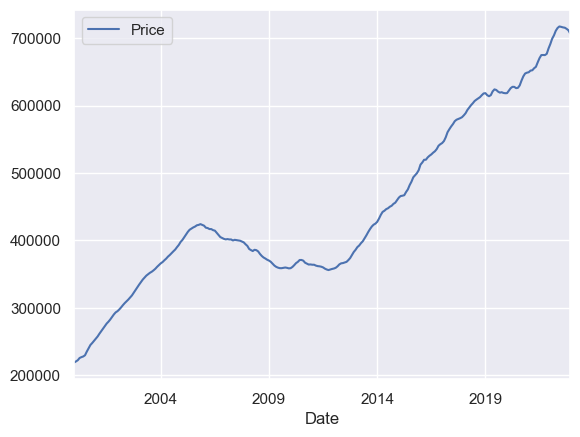

In [8]:
Boston_df['Date'] = pd.to_datetime(Boston_df['Date'])
Boston_df.plot(x='Date', y='Price', kind='line')
plt.show()

In [9]:
Boston_df['Price'] = pd.to_numeric(Boston_df['Price'], errors='coerce')

In [13]:
# Convert the Date column to Categorical
Boston_df['Date'] = pd.Categorical(Boston_df['Date'])

# Fit your linear regression model using Patsy
import patsy
y, X = patsy.dmatrices("Price ~ Date", data=Boston_df, return_type="dataframe")

In [16]:


Boston_df["Date"] = pd.Categorical(Boston_df["Date"])
Boston_df["Date"] = Boston_df["Date"].cat.codes

X = Boston_df.iloc[:, :-1].values
y = Boston_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [19]:
reg = LinearRegression()

#print model summary
#print(Reg.summary())

# fit the model to the training data
reg.fit(X_train, y_train)
# initialize the model
reg = LinearRegression()

# fit the model to the training data
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
#Get Slope
slope = reg.coef_
intercept = reg.intercept_
print("slope:",slope)
print("intercept:",intercept)

slope: [1465.21294605]
intercept: 245064.09897025852


In [27]:
# Use the model to make a prediction on the to any date after 31-12-2022
number_days_after_last_date=120


day_predict= [Boston_df["Date"].max() + number_days_after_last_date]#1 day after the last day in the dataset 

new_date = pd.DataFrame({"Date_Code": day_predict})

prediction = reg.predict(new_date)

print("Prediction of day number ",number_days_after_last_date, "after 31-12-2022 is:", prediction[0])

Prediction of day number  120 after 31-12-2022 is: 823823.2126586412


C:\Users\ROEYE\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
